# Threshold algorithm

In [4]:
import random
import networkx as nx

In [41]:
class Threshold:
    def __init__(self, graph, threshold, epsilon):
        self._graph = graph
        self._threshold = threshold
        self._epsilon = epsilon
        self._n = nx.number_of_nodes(self._graph)
        
    def set_opinions(self, opinion0_count):
        opinions = [0]*opinion0_count + [1]*(self._n-opinion0_count)
        random.shuffle(opinions)
        d = {list(self._graph.nodes())[i] : opinions[i] for i in range(self._n)}
        nx.set_node_attributes(self._graph, d, 'state')
    
    def threshold_algorithm(self, q, steps):
        for i in range(steps):
            node = random.choice(list(self._graph.nodes()))
            curr_q = q
            if q > self._graph.degree[node]:
                curr_q = self._graph.degree[node]
            neighbor_list = random.choices(list(self._graph.neighbors(node)), k=q)
            node_opinion = self._graph.nodes[node]['state']
            contrary_opinion = 0 if node_opinion == 1 else 1
            op0_num = (self._n - list(nx.get_node_attributes(self._graph, 'state').values()).count(node_opinion))/self._n
            if op0_num >= self._threshold or (random.uniform(0, 1) < self._epsilon and op0_num > 0):
                self._graph.nodes[node]['state'] = contrary_opinion
        return self._graph
                

In [56]:
RG = nx.erdos_renyi_graph(1000, 0.5)

In [57]:
dupa = Threshold(RG, 0.5, 0.001)

In [60]:
dupa.set_opinions(400)

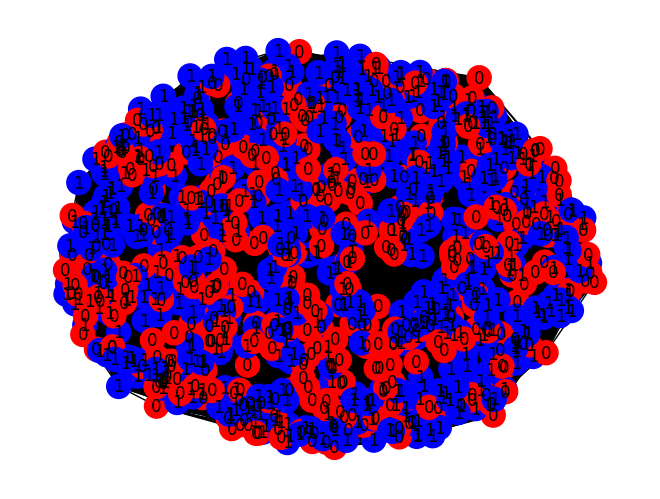

In [61]:
colors = {0:'red', 1:'blue'}
labels = nx.get_node_attributes(RG, 'state')
node_color = [colors[state] for state in labels.values()]
nx.draw(RG, labels=labels, node_color=node_color)

In [64]:
newRG = dupa.threshold_algorithm(100, 1000)

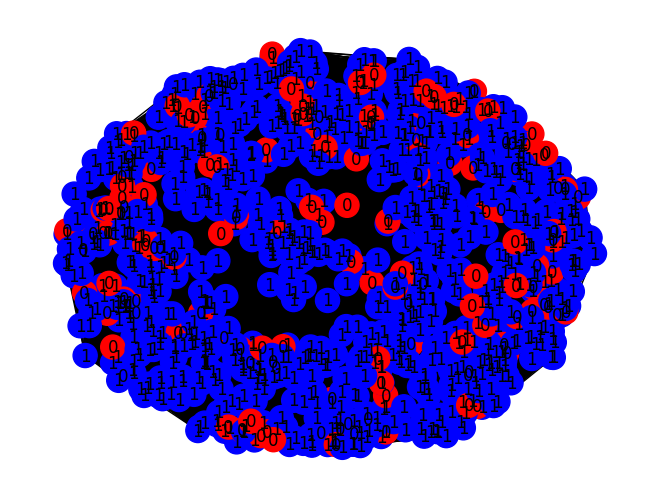

In [65]:
labels = nx.get_node_attributes(newRG, 'state')
node_color = [colors[state] for state in labels.values()]
nx.draw(newRG, labels=labels, node_color=node_color)